In [1]:
import graph_tool_extras as gte
import netpixi
from graph_tool import draw

In [2]:
g = gte.load('big_five_agree.net.gz')

In [3]:
g.density()

0.26314

In [4]:
g.transitivity()

35.217591

In [5]:
g.num_edges()

137302

In [6]:
g.num_vertices()

10216

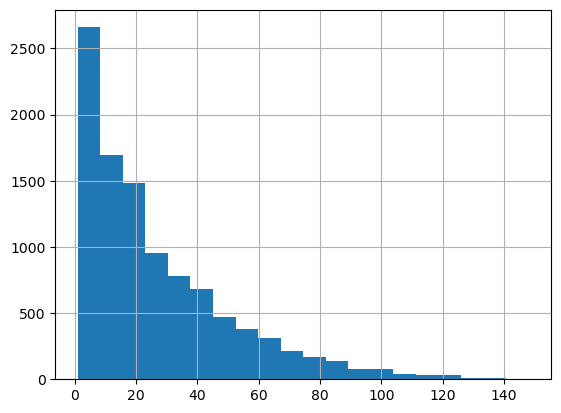

In [7]:
degrees = g.get_total_degrees()

degrees.hist(bins=20);

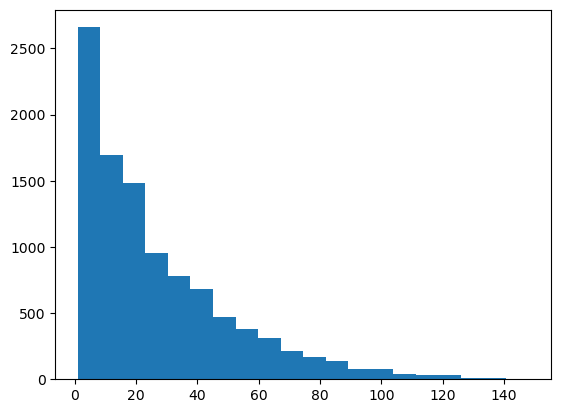

In [8]:
import matplotlib.pyplot as plt

# Suponha que 'degrees' seja o seu objeto de dados
plt.hist(degrees, bins=20)  # Crie o histograma


# Salve o histograma em um arquivo PNG
plt.savefig('histograma.png', format='png')

# Exiba o histograma, se desejar
plt.show()

In [9]:
degrees.describe()

count    10216.000000
mean        26.879796
std         24.516602
min          1.000000
25%          8.000000
50%         19.000000
75%         38.000000
max        148.000000
dtype: float64

In [10]:
import distribution as dst

In [11]:

resultado = dst.not_normal(degrees)

# Aumente o número de casas decimais, por exemplo, para 4 casas decimais
resultado_formatado = round(resultado, 4)

print(resultado_formatado)


0.0


In [12]:
dst.more_powerlaw_than_lognormal(degrees)

Calculating best minimal value for power law fit


(False, 0.5002591993326471)

In [13]:
dst.more_powerlaw_than_exponential(degrees)

Calculating best minimal value for power law fit


(False, 0.26904334516637896)

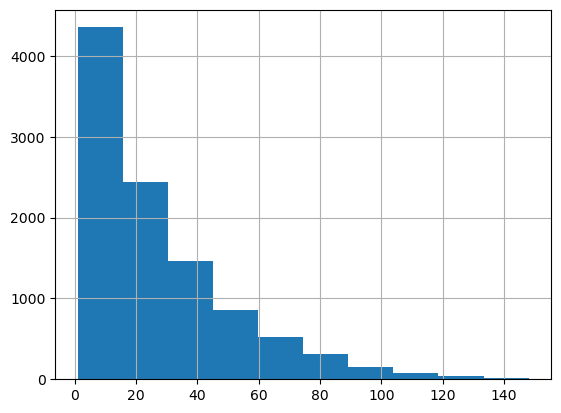

In [14]:
degrees.hist();

## Distancias

In [15]:
import random
from graph_tool import Graph, load_graph

# Número de vértices no grafo original
num_vertices = 10216

# Tamanho da amostra (por exemplo, 8000)
sample_size = 1021

# Crie uma lista com 'sample_size' índices de vértices aleatórios
random_vertex_indices = random.sample(range(num_vertices), sample_size)

In [16]:
# Crie um novo grafo vazio
new_graph = Graph(directed=False)

In [17]:
# Crie um dicionário para mapear os IDs dos vértices originais para os vértices no novo grafo
vertex_mapping = {}

In [18]:
# Adicione os vértices aleatórios ao novo grafo e faça o mapeamento
for vertex_index in random_vertex_indices:
    new_vertex = new_graph.add_vertex()
    vertex_mapping[vertex_index] = new_vertex

In [19]:
# Transferir as arestas existentes entre os vértices selecionados
for source_vertex_index in random_vertex_indices:
    source_vertex = vertex_mapping[source_vertex_index]
    for neighbor in g.vertex(source_vertex_index).all_neighbors():
        target_vertex_index = neighbor.out_degree()
        if target_vertex_index in random_vertex_indices:
            new_target_vertex = vertex_mapping[target_vertex_index]
            new_graph.add_edge(source_vertex, new_target_vertex)

In [20]:
new_graph.num_edges()

1529

In [21]:
new_graph.num_vertices()

1021

In [22]:
# Suponha que você deseja calcular as distâncias a partir de um vértice de origem, por exemplo, o vértice 0.
source_vertex_index = 0

In [23]:
# Suponha que você deseja calcular as distâncias a partir de um vértice de origem, por exemplo, o vértice 0.
source_vertex_index = 0

In [24]:
new_graph.save('new_graph.gt')

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from graph_tool import Graph
from graph_tool.topology import shortest_distance


In [26]:
# Escolha o vértice de origem (por exemplo, o primeiro vértice)
source_vertex = new_graph.vertex(0)


In [27]:

# Calcule as distâncias mínimas usando BFS
distances = shortest_distance(g, source=source_vertex)


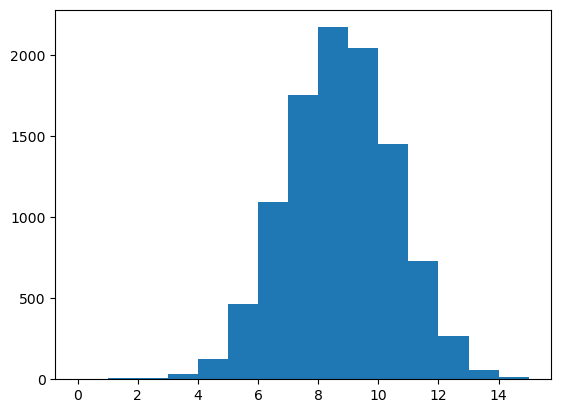

In [40]:
# Plote o histograma
plt.hist(distances.a, bins=15)

# Salve o histograma em um arquivo de imagem (por exemplo, PNG)
plt.savefig('histograma_distancias.png')

# Mostre a figura
plt.show()

In [39]:
plt.savefig('histograma_distancias.png')

<Figure size 640x480 with 0 Axes>

In [41]:
import numpy as np
from graph_tool import Graph
from graph_tool.topology import shortest_distance

In [42]:
# Escolha o vértice de origem (por exemplo, o primeiro vértice)
source_vertex = new_graph.vertex(0)

# Calcule as distâncias mínimas usando BFS
distances = shortest_distance(g, source=source_vertex)

# Calcule as estatísticas descritivas das distâncias
mean_distance = np.mean(distances.a)
std_deviation = np.std(distances.a)
min_distance = np.min(distances.a)
q25 = np.percentile(distances.a, 25)
median = np.percentile(distances.a, 50)
q75 = np.percentile(distances.a, 75)
max_distance = np.max(distances.a)

# Imprima as estatísticas descritivas
print(f"mean {mean_distance:.6f}")
print(f"std  {std_deviation:.6f}")
print(f"min. {min_distance:.6f}")
print(f"25%  {q25:.6f}")
print(f"50%  {median:.6f}")
print(f"75%  {q75:.6f}")
print(f"max  {max_distance:.6f}")

mean 8.244714
std  1.817221
min. 0.000000
25%  7.000000
50%  8.000000
75%  9.000000
max  15.000000
